# 使用漏斗分析法提高某英文阅读APP的付费转化率

### 概要

每一个环节都只会有部分用户走到下一个环节，走到的我们称为转化，没有走到的我们称为流失，这一系列环节就像一层层漏斗一样。对应的，我们将一层一层分析转化的方法称为**漏斗（Funnel）分析法**。

我发现，该阅读APP登录的新用户不少，但是购买的人很少，通过漏斗分析法，我们想要发现究竟在哪几层转化特别低值得优先改善。特别的，改善某一层转化的时候，我也只要把焦点集中在对应这一层的产品交互环节，有的放矢。

**目标**是通过 Python 和数据分析，不断迭代产品，并且优化 AAARR 增长模型的每一个环节，让产品用户量和收入齐涨。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 导入数据

In [2]:
# 活跃用户ID
active_uids = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/22f0e6eaefcfb277176d59e8125cf505.f75f6a24bf8052409e4a0ca5b52c951a.csv')
# 进入书籍页面的ID
enterbook_uids = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/aa3af5c54faea4567e02056fb96f0d09.d6312693cb816c2454eba79e46d9ba8c.csv')
# 试读用户的ID
trial_uids = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/91b8b8a4df4f78b7ebae222cef306f9a.5a61749229d5f45c8a3336815ab0552c.csv')
# 购书用户的ID
paid_uids = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/8e25e9bffcce021c90335ec6900efb4b.28080b0032a0f39617346f4eead7f548.csv')

In [3]:
print(active_uids[:10])

[148965. 193031. 194602. 119084. 136835. 110552. 122889. 153654. 151149.
 182500.]


### 2. 数据处理

In [4]:
# 获取每个文件内容的长度
num_active_uids = len(active_uids)
num_enterbook_uids = len(enterbook_uids)
num_trial_uids = len(trial_uids)
num_paid_uids = len(paid_uids)

In [5]:
print("活跃用户数：%d" % num_active_uids)
print("打开书籍页面用户数：%d" % num_enterbook_uids)
print("试读用户数：%d" % num_trial_uids)
print("购书用户数：%d" % num_paid_uids)

活跃用户数：9753
打开书籍页面用户数：1359
试读用户数：973
购书用户数：149


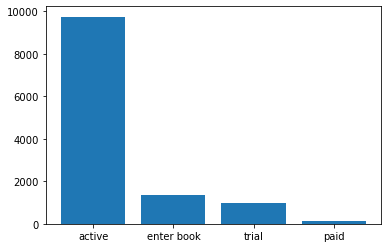

In [6]:
# 绘制一个柱状图的漏斗
x = ['active', 'enter book', 'trial', 'paid']
y = [num_active_uids, num_enterbook_uids, num_trial_uids, num_paid_uids]
plt.bar(x, y)
plt.show()

根据图表，发现从试读到购买的转化率不高。但是实际上有两个购买的入口，一个和试读并列，另一个是试读一章的末尾。也就是说，其实存在两条不同的购买转化路径，需要分别分析。

首先，分析那些进入书籍页，没有试读而直接购买的用户。经过试读再购买的用户 ID，一定同时属于试读用户的 ID，也属于购买用户的 ID。

In [7]:
# 将列表转化为集合，并找出交集
trial_uids_set = set(trial_uids)
paid_uids_set = set(paid_uids)

paid_with_trial_uids = trial_uids_set.intersection(paid_uids_set)
num_paid_with_trial_uids = len(paid_with_trial_uids)

print("有%d位用户先试读后再购书" % num_paid_with_trial_uids)

有22位用户先试读后再购书


In [8]:
# 寻找没有试读就购买的用户
trial_uids_set = set(trial_uids)
paid_uids_set = set(paid_uids)
paid_with_trial_uids = trial_uids_set & paid_uids_set

paid_without_trial_uids = paid_uids_set.difference(trial_uids_set)
num_paid_without_trial_uids = len(paid_without_trial_uids)

print("有%d位用户没有试读就购书" % num_paid_without_trial_uids)

有114位用户没有试读就购书


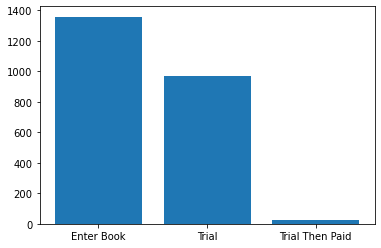

In [9]:
# 按照两个不同的路径，分别绘出两个漏斗
# 漏斗一：用户经过 进入书籍页面-试读书籍-试读后购买 三步。
x = ['Enter Book', 'Trial', 'Trial Then Paid']
nums = [num_enterbook_uids, num_trial_uids, num_paid_with_trial_uids]
plt.bar(x, nums)
plt.show()

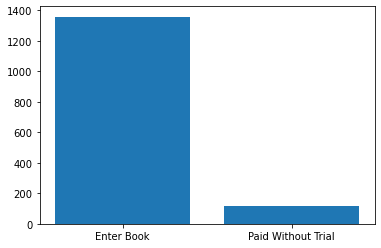

In [10]:
# 漏斗二：用户经过 进入书籍页面-直接购买 两步。
x = ['Enter Book', 'Paid Without Trial']
nums = [num_enterbook_uids, num_paid_without_trial_uids]
plt.bar(x, nums)
plt.show()

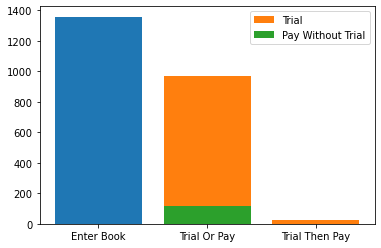

In [11]:
# 漏斗三：结合上述两个漏斗
x = ['Enter Book', 'Trial Or Pay', 'Trial Then Pay']
nums_enter_book = [num_enterbook_uids, 0, 0]
plt.bar(x, nums_enter_book)

nums_trial = [0, num_trial_uids, num_paid_with_trial_uids]
plt.bar(x, nums_trial, label='Trial')

nums_without_trial = [0, num_paid_without_trial_uids, 0]
plt.bar(x, nums_without_trial, label='Pay Without Trial')

plt.legend()
plt.show()

在漏斗的第二层，也就是对应用户进入书籍页的第二步，绝大部分（973）用户选择了试读，少部分（114）用户选择了直接购买；但是试读用户后续只有 22 位购书，也就是说，经过试读的用户再购书的数量和转换，远远小于那些一进书籍页直接买书的用户。

于是，我就产生了一个思考——试读究竟有没有用？如果取消会怎样，是否会增加？

如果我决定先取消试读功能，然后观察和比较购买转化率，这个结果很可能不客观。因为外部环境是随时间不断发生变化的，如果在不同的日期做实验，即便结果上有差别，那么我们很难解释这个差别是因为我们在 APP 上的更改导致，还是因为日期本身导致，因为不同的日期（譬如周末、节假日、双十一）对用户消费行为是会产生影响的。所以我决定进行一次 AB 测试。

经过一天的AB测试后，得到了以下数据。

### 3. 对比AB测试

In [12]:
# A组活跃用户ID
active_uids_A = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/4b656482b421cf8b7fe1320f33a11366.0f9ce2db4545294838c80f03bd1cc748.csv')
# A组进入书籍页面用户ID
enterbook_uids_A = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/509ccfddd9527cc94754747fd39cbdd1.898797608e8ea3b0effd3fd8cad55c97.csv')
# A组试读用户ID
trial_uids_A = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/265bbd609edcf2285e88e4ab2bf7543c.68864954d8f79cbfbba24e7dad149948.csv')
# A组购书用户ID
paid_uids_A = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/3bffb08b0a96eeae9a09ecf9f7f32cce.7d638e84fea03325ced8c19d6efd7c5e.csv')

# B组活跃用户ID
active_uids_B = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/c40f6b08d77a11349b69d06e2ca19d58.3578e85cdc7b1db8b1d240ae5a2ac86b.csv')
# B组进入书籍页面用户ID
enterbook_uids_B = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/46a3c26c42c91b1d91ea932c375982de.92fc2cb19ade30aaa8b98ecc1ed2856f.csv')
# B组购书用户ID
paid_uids_B = np.genfromtxt('https://media-zip1.baydn.com/storage_media_zip/qkklny/0a7e5bc8e4cad60375afa9e6b6ced0c8.a8ae7b8063542ee3efe8a66c00c97b9e.csv')

In [13]:
num_active_uids_A = len(active_uids_A)
num_enterbook_uids_A = len(enterbook_uids_A)
num_trial_uids_A = len(trial_uids_A )
num_paid_uids_A = len(paid_uids_A)
num_active_uids_B = len(active_uids_B)
num_enterbook_uids_B = len(enterbook_uids_B)
num_paid_uids_B = len(paid_uids_B)

In [14]:
print("A组数据")
print("-----------")
print("活跃用户数：%d" % num_active_uids_A)
print("打开书籍页面用户数：%d" % num_enterbook_uids_A)
print("试读用户数：%d" % num_trial_uids_A)
print("购书用户数：%d" % num_paid_uids_A)
print("    ")
print("B组数据")
print("-----------")
print("活跃用户数：%d" % num_active_uids_B)
print("打开书籍页面用户数：%d" % num_enterbook_uids_B)
print("购书用户数：%d" % num_paid_uids_B)

A组数据
-----------
活跃用户数：5000
打开书籍页面用户数：753
试读用户数：473
购书用户数：74
    
B组数据
-----------
活跃用户数：5000
打开书籍页面用户数：749
购书用户数：128


B 组没有试读环节，也就是比 A 组少一个数，我创造一个 num_trial_uids_B 变量，让它数值为 0

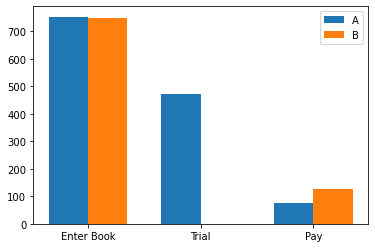

In [15]:
num_trial_uids_B = 0

labels = ['Enter Book', 'Trial', 'Pay']
data_A = [num_enterbook_uids_A, num_trial_uids_A, num_paid_uids_A]
data_B = [num_enterbook_uids_B, num_trial_uids_B, num_paid_uids_B]

x = np.arange(len(labels))  # 标签位置
width = 0.35  # 每条柱的宽度
plt.bar(x - width/2, data_A, width, label='A')
plt.bar(x + width/2, data_B, width, label='B')

# 添加漏斗名称和标签名称
plt.xticks(x, labels)
# 添加图例
plt.legend()
plt.show()

可以发现在进入书籍页这一层，A、B 两组的数据是差不多的，因为我的实验是针对书籍页面内部的试读按钮，并不会影响用户从书籍首页进入书籍页的判断，因为此时他们看不到书籍页面长什么样。

我们同时可以看到 B 组支付的数据是显著高于 A 组的。因此得出结论，取消了试读后，该阅读APP的销量会更好。

谨慎起见，我将这个 AB 测试持续了一周，发现每天的结果都和第一天一样，那么我们对实验结果的有效性充满了信心。所以我们的工作是有效的。

### 4. 分组分析

虽然数据验证了取消试读后用户反而更愿意购买，但是这背后的原因还需要进一步探索。例如包括豆瓣阅读、微信读书在内的主流阅读软件都有试读功能，显然试读的存在有它的意义。

所以，如果想要理解为什么在该阅读APP中试读的用户相比于不试读的用户更不愿意购买，就必须分析试读的这部分用户的行为和数据。

用户开始试读后，第一次进入书籍阅读页面后，有以下三种可能的行为：读书、下一页、退出阅读。因此，我发现一个问题：下一页、退出阅读都是对应具体的按钮，程序可以检测用户有没有点击这两个按钮，但是用户有没有读书，我该如何获取信息？

最后，我发现我不能直接知道用户有没有在读书，但是可以知道用户花了多少时间停留在这个阅读界面上。除去极少数例外，用户停留的时间越长，越有可能在读书。

所以我找到了试读用户在进入阅读页面的停留时间数据，而且这一次，我决定不要所有用户在所有书籍的试读数据，而是指定了一本书《小王子》。因为不同书的难度是不一样的，用户的英语阅读能力也不一样，有些书第一页读完只要 3 分钟，有些就要 15 分钟，那么放在一起比较就很难看出问题。

所以我选择《小王子》，一来根据我们已经掌握的销售数据，这本书的试读人数和购买人数都不少，二来这本书的难度适宜，所以将它作为研究对象。

以下是过去一周，，所有《小王子》的试读数据。

In [16]:
prince_trial = 'https://media-zip1.baydn.com/storage_media_zip/qkklny/7e8e1941cb36ad97cbaa6eed0dff441e.cd58f0dcbe18f95e2b1912dbd63a4e67.csv'
df = pd.read_csv(prince_trial)
print(df.head())

   user_id  time_stay  next_page  quit_trial  finish_trial    pay
0   125777         26       True       False         False  False
1   116871         37      False        True         False  False
2   151189         41       True       False         False  False
3   122393         33      False        True         False  False
4   141494         10      False        True         False  False


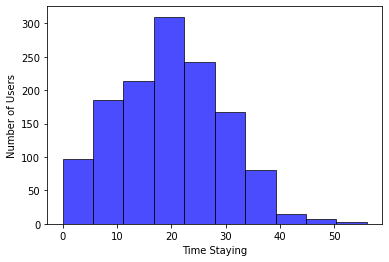

In [17]:
# 绘制直方图
plt.hist(df['time_stay'], bins=10, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Time Staying")
plt.ylabel("Number of Users")
plt.show()

可以发现，绝大部分试读用户在第一页的停留时间，不超过 30 秒，如果不超过 30 秒，很显然是读不完一页内容的，他们点击下一页的可能性应该也不大。

为了验证这个猜想，我们将用户分成两组，一组阅读时间在 30 秒及以下，另一组在 30 秒以上，分别观察点击下一页的比例是多少。

In [18]:
# 从所有数据中查找 time_stay 字段的值小于等于 30 的数据记录
under_30 = df[df['time_stay'] <= 30]

# 从所有数据中查找 time_stay 字段的值大 30 的数据记录
above_30 = df[df['time_stay'] > 30]

# 记录两组人数
num_under_30 = len(under_30)
num_above_30 = len(above_30)

# 从两组中查找点击下一页为 True 的数据记录（ == True 可以省略）
under_30_and_next_page = under_30[under_30['next_page']]
above_30_and_next_page = above_30[above_30['next_page']]

num_under_30_and_next_page = len(under_30_and_next_page)
num_above_30_and_next_page = len(above_30_and_next_page)

ratio_under_30_and_next_page = num_under_30_and_next_page / num_under_30
ratio_above_30_and_next_page = num_above_30_and_next_page / num_above_30

print("阅读时间在30秒及以下，总人数为%d，点击下一页的人数为%d，比例为%.0f%%" %
  (num_under_30, num_under_30_and_next_page, 100 * ratio_under_30_and_next_page))
print("阅读时间在30秒以上，总人数为%d，点击下一页的人数为%d，比例为%.0f%%" %
  (num_above_30, num_above_30_and_next_page, 100 * ratio_above_30_and_next_page))

阅读时间在30秒及以下，总人数为1134，点击下一页的人数为9，比例为1%
阅读时间在30秒以上，总人数为188，点击下一页的人数为64，比例为34%


In [27]:
# 验证购买的比例也和阅读时间存在关联的猜想
# 从所有数据中查找 time_stay 字段的值小于等于 30 的数据
under_30 = df[df['time_stay'] <= 30]

# 从所有数据中查找 time_stay 字段的值大 30 的数据
above_30 = df[df['time_stay'] > 30]

# 记录两组人数
num_under_30 = len(under_30)
num_above_30 = len(above_30)

# 从两组中查找已购买的数据，也就是 pay 字段的值为 True 的数据
under_30_and_pay = under_30[under_30['pay']]
above_30_and_pay = above_30[above_30['pay']]

num_under_30_and_pay = len(under_30_and_pay)
num_above_30_and_pay = len(above_30_and_pay)

ratio_under_30_and_pay = num_under_30_and_pay / num_under_30
ratio_above_30_and_pay = num_above_30_and_pay / num_above_30

print("阅读时间在30秒及以下，总人数为%d, 购买的人数为%d，比例为%.0f%%" %
  (num_under_30, num_under_30_and_pay, 100 * ratio_under_30_and_pay))
print("阅读时间在30秒以上，总人数为%d, 购买的人数为%d，比例为%.0f%%" %
  (num_above_30, num_above_30_and_pay, 100 * ratio_above_30_and_pay))

阅读时间在30秒及以下，总人数为1134, 购买的人数为41，比例为4%
阅读时间在30秒以上，总人数为188, 购买的人数为18，比例为10%


通过结果，已经发现了阅读时间和用户是否点下一页，乃至和购买之间的相关关系。但是，我们并不可以说，只要让用户阅读时间变长，就能最终增加购买。

### 5. 相关性和因果性

数据科学里有一条非常重要的原则：相关性不代表因果性。譬如说，一家超市发现冰激凌和空调的销售量之间存在相关关系，并不代表超市想办法增加冰激凌销量，就能相应增加空调销量。因为夏天到了天气炎热才是这两者销量同时上升的原因。

在我们的产品里，很可能有一个因素，会同时导致用户阅读时间短，以及不愿意购买。

这时候，我们又想到，该阅读APP和豆瓣阅读或者微信读书有一个非常本质的区别，就是该阅读APP主打英文阅读，而其他读书 APP 上的内容主要都是中文。用户看不懂一本中文书的主要原因是因为内容太复杂或者晦涩，而看不懂英文书则很可能是因为英语能力不够。

所以说，那么多放弃的用户，是不是因为虽然想读英文版的小王子，但是真的去读了，发现自己的英语能力不够所以直接放弃。要验证这点，要么能够找到足够多的用户去做问卷调查和访谈，要么在产品里直接询问用户。

于是我们在用户点返回的环节上，做了一个弹窗，询问用户为什么放弃，是对内容本身不感兴趣，还是觉得太难，还是两者都有，或者都不是。

搜集了两天的数据，总共收到了 1167 份有效反馈。其中，因为**不感兴趣**而选择退出的有138人，因为**看不懂英文**而退出的有792人，因为**两者都是**退出的有113人，因为**其他原因**而退出的有124人。

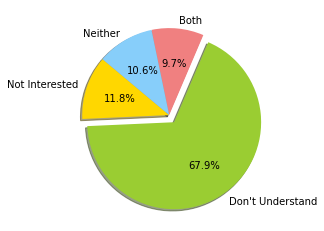

In [19]:
# 数据准备
labels = ['Not Interested', 'Don\'t Understand', 'Both', 'Neither']
data = [138, 792, 113, 124]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # 让面积最大的部分分离出来一些，增强效果
plt.pie(data, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

现在我可以确认了，之前 AB 测试中，A 组中选择了试读的大部分用户，的确是因为在试读阶段发现看不懂就草草放弃了；而 B 组的用户因为没有试读机会，很多本来看不懂的用户并不知道自己看不懂，于是先买了再说。而中文书阅读 APP 为什么可以大大方方的提供试读功能，是因为试读后因为看不懂就放弃购买的可能性不大。

所以，我们完整的经历了一个发现问题、提出假设、试验分析、提出方案的过程。在这个过程中，数据分析发挥了不可或缺但是并非唯一的作用，因为发现问题和提出假设需要洞察力，提出方案需要创造力，这些能力并非仅仅看数字就能获得。

虽然我们已经知道了取消试读功能会增加购买转化，但总觉得哪里有些不对劲。因为我们明知道用户看不懂，但是非要想办法卖给他们，这种行为显然是不可取的。我们希望用户来到该阅读APP，不仅仅是买书，而是能够真的看完一本英文书。我们的产品只有能够对用户的学习、工作、生活真正的产生价值，产品本身才能够具备长期的价值和口碑。

既然我们已经明确用户看不懂英文是最主要的症结，那么我们就需要想办法帮助用户看懂。依据经验，阅读英文最大的障碍之一是生词，于是我们开发了一个阅读过程中可以对单词即点即查的功能，来解决用户所遇到的问题，提高用户付费转化率。